# PUBG Analytics Report

### The goal is to discover whether the player’s death is related  to other factors, if yes, how much related 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.misc.pilutil import imread
import matplotlib.cm as cm

In [2]:
aggregate0 = pd.read_csv("agg_match_stats_0.csv",nrows=10000)
aggregate1 = pd.read_csv("agg_match_stats_1.csv",nrows=10000)
aggregate2 = pd.read_csv("agg_match_stats_2.csv",nrows=10000)
aggregate3 = pd.read_csv("agg_match_stats_3.csv",nrows=10000)
aggregate4 = pd.read_csv("agg_match_stats_4.csv",nrows=10000)

aggregate = pd.concat([aggregate0,aggregate1,aggregate2,aggregate3, aggregate4])

print (aggregate.head(),'\n',len(aggregate))

                       date  game_size  \
0  2017-11-26T20:59:40+0000         37   
1  2017-11-26T20:59:40+0000         37   
2  2017-11-26T20:59:40+0000         37   
3  2017-11-26T20:59:40+0000         37   
4  2017-11-26T20:59:40+0000         37   

                                            match_id match_mode  party_size  \
0  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   
1  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   
2  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   
3  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   
4  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   

   player_assists  player_dbno  player_dist_ride  player_dist_walk  \
0               0            1        2870.72400       1784.847780   
1               0            1        2938.40723       1756.079710   
2               0            0           0.00000        224.15

In [3]:
aggregate['match_mode'] = aggregate['match_mode'].astype(object)
#print (aggregate.head(),'\n',len(aggregate))


# create a binary variable for future analysis.

aggregate['win'] = np.where(aggregate['team_placement']==1, 1, 0)
print(aggregate.dtypes)

date                    object
game_size                int64
match_id                object
match_mode              object
party_size               int64
player_assists           int64
player_dbno              int64
player_dist_ride       float64
player_dist_walk       float64
player_dmg               int64
player_kills             int64
player_name             object
player_survive_time    float64
team_id                  int64
team_placement           int64
win                      int32
dtype: object


In [4]:
# solo match
solo=aggregate[aggregate["party_size"]==1]
print (len(solo))

10403


In [5]:
# duo match
duo=aggregate[aggregate["party_size"]==2]
print (len(duo))

15620


In [6]:
# quad match
quad=aggregate[aggregate["party_size"]==4]
print (len(quad))

23977


In [7]:
# data split
Xsolo = solo.iloc[:,[5,6,7,8,9,10,12]].values


print(Xsolo.shape)
print (Xsolo[:5])
ysolo = solo.iloc[:,15].values

print(ysolo[0:20])
print(ysolo.shape)

(10403, 7)
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.70954788e+02
    0.00000000e+00   0.00000000e+00   1.86999000e+02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   6.65455900e+01
    0.00000000e+00   0.00000000e+00   1.24782000e+02]
 [  0.00000000e+00   0.00000000e+00   7.28722656e+02   6.10168945e+02
    1.24000000e+02   0.00000000e+00   8.39161000e+02]
 [  0.00000000e+00   0.00000000e+00   2.64618400e+03   1.43129200e+03
    2.40000000e+01   0.00000000e+00   7.51716000e+02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   7.23102300e+02
    1.00000000e+02   1.00000000e+00   7.44088000e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(10403,)


In [8]:
Xduo = duo .iloc[:,[5,6,7,8,9,10,12]].values


print(Xduo .shape)
print (Xduo [:5])
yduo  = duo .iloc[:,15].values

print(yduo [0:20])
print(yduo .shape)

(15620, 7)
[[  0.00000000e+00   1.00000000e+00   2.87072400e+03   1.78484778e+03
    1.17000000e+02   1.00000000e+00   1.10632000e+03]
 [  0.00000000e+00   1.00000000e+00   2.93840723e+03   1.75607971e+03
    1.27000000e+02   1.00000000e+00   1.10631500e+03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   2.24157562e+02
    6.70000000e+01   0.00000000e+00   2.35558000e+02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   9.29351500e+01
    0.00000000e+00   0.00000000e+00   1.97553000e+02]
 [  0.00000000e+00   0.00000000e+00   2.61907739e+03   2.51044700e+03
    1.75000000e+02   2.00000000e+00   1.53749500e+03]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(15620,)


In [9]:
Xquad = quad.iloc[:,[5,6,7,8,9,10,12]].values


print(Xquad .shape)
print (Xquad [:5])
yquad  = quad .iloc[:,15].values

print(yquad[0:20])
print(yquad.shape)

(23977, 7)
[[  3.00000000e+00   6.00000000e+00   6.71784600e+03   2.82298462e+03
    1.11600000e+03   9.00000000e+00   1.76708700e+03]
 [  1.00000000e+00   7.00000000e+00   5.14978900e+03   2.57848535e+03
    1.05900000e+03   9.00000000e+00   1.76708700e+03]
 [  3.00000000e+00   0.00000000e+00   4.18951654e+00   1.95526746e+03
    2.01000000e+02   0.00000000e+00   1.76708700e+03]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   2.61036841e+03
    5.40000000e+01   0.00000000e+00   9.05129000e+02]
 [  0.00000000e+00   2.00000000e+00   0.00000000e+00   3.05831000e+03
    1.78000000e+02   2.00000000e+00   9.05125000e+02]]
[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(23977,)


In [10]:
# let's first analysis solo match data

In [11]:


#from sklearn.cross_validation import train_test_split # this is DeprecationWarning

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xsolo, ysolo, test_size = 0.2, 
                                                    stratify=ysolo,
                                                    random_state = 1)

print(X_train.shape, X_test.shape)

(8322, 7) (2081, 7)


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
#from sklearn.decomposition import KernelPCA

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),      # Step 4
                    ('pca', PCA(n_components = 2)), # Step 5
                    ('clf', LogisticRegression(random_state=1))]) # Step 6

pipe_lr.fit(X_train, y_train) 

print('Test Accuracy: %0.6f' % pipe_lr.score(X_test, y_test)) # Step 7 evaluate

Test Accuracy: 0.993753


In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# p. 193 -- StratifiedKFold cross-validation example
import numpy as np

from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits = 10, 
                       random_state = 1).split(X_train, y_train)

scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])    
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Accuracy %0.3f' % (k+1, 
           np.bincount(y_train[train]), score))

Fold: 1, Class dist.: [7408   81], Accuracy 0.990
Fold: 2, Class dist.: [7408   81], Accuracy 0.989
Fold: 3, Class dist.: [7409   81], Accuracy 0.989
Fold: 4, Class dist.: [7409   81], Accuracy 0.987
Fold: 5, Class dist.: [7409   81], Accuracy 0.993
Fold: 6, Class dist.: [7409   81], Accuracy 0.992
Fold: 7, Class dist.: [7409   81], Accuracy 0.989
Fold: 8, Class dist.: [7409   81], Accuracy 0.989
Fold: 9, Class dist.: [7409   81], Accuracy 0.989
Fold: 10, Class dist.: [7409   81], Accuracy 0.990


In [15]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.990 +/- 0.002


In [16]:
# Using cross_val_score() for more succinct code
from sklearn.model_selection import cross_val_score # uses stratified k-fold cross-validation

scores = cross_val_score( estimator = pipe_lr,
                        X = X_train,
                        y = y_train,
                        cv = 10,
                        n_jobs = 1)

print('CV accuracy scores: %s' % scores)
print('Mean CV: %.3f' % np.mean(scores))

CV accuracy scores: [ 0.99039616  0.98919568  0.98918269  0.98677885  0.99278846  0.99158654
  0.98918269  0.98918269  0.98918269  0.99038462]
Mean CV: 0.990


In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve

pipe_lr = Pipeline([
        ('scl', StandardScaler()),
#        ('pca', PCA(n_components = 2)),
        ('clf', LogisticRegression(penalty='l2', random_state=0))])

train_sizes, train_scores, test_scores = learning_curve( estimator = pipe_lr,
                                                       X = X_train,
                                                       y = y_train,
                                                       train_sizes = np.linspace(0.1, 1.0, 10), # 10 evenly spaced intervals 
                                                       cv = 10,
                                                       n_jobs = 1)

Text(0.5,1,'Learning Curve')

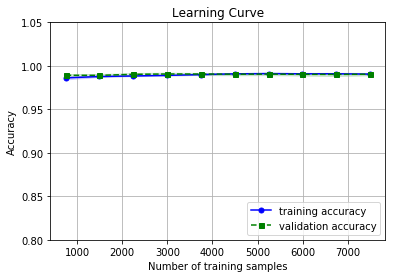

In [18]:
train_mean = np.mean(train_scores, axis = 1)
train_std  = np.std(train_scores, axis = 1)
test_mean  = np.mean(test_scores, axis = 1)
test_std  = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, 
         color = 'blue', marker = 'o', 
         markersize = 5, 
         label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, 
                              train_mean - train_std,
                              alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, 
         color = 'green', linestyle = '--',  
         marker = 's', markersize = 5, 
         label = 'validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, 
                              test_mean - test_std,
                              alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.8, 1.05])
plt.title('Learning Curve')

Text(0.5,1,'Validation Curve')

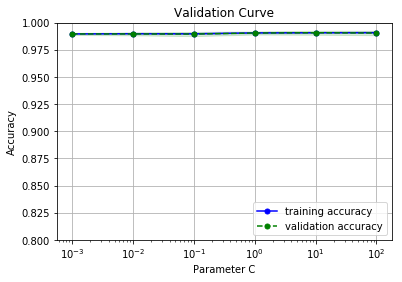

In [19]:
# Overfitting and underfitting with Validation Curves 
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] # comparative statics 

train_scores, test_scores = validation_curve(
                        estimator = pipe_lr,
                        X = X_train,
                        y = y_train,
                        param_name = 'clf__C',
                        param_range = param_range, 
                        cv = 10)

train_mean = np.mean(train_scores, axis = 1)
train_std   = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std   = np.std(test_scores, axis = 1)

plt.plot(param_range, train_mean, 
         color = 'blue', marker = 'o', 
         markersize = 5, 
         label = 'training accuracy')
plt.fill_between(param_range, train_mean + train_std, 
                              train_mean - train_std,
                              alpha = 0.15, color = 'blue')

plt.plot(param_range, test_mean, 
         color = 'green', linestyle = '--',
         marker = 'o', markersize = 5, 
         label = 'validation accuracy')
plt.fill_between(param_range, test_mean + test_std, 
                              test_mean - test_std,
                              alpha = 0.15, color = 'green')

plt.grid()
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.title('Validation Curve')

In [20]:
# Fine-tuning ML with Grid Search
# Grid search is a brute force exhaustive searching paradigm
# specify list of hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()), 
                     ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range,
               'clf__kernel': ['linear']},
              {'clf__C': param_range,
               'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator = pipe_svc,
                 param_grid = param_grid,
                 scoring = 'accuracy',
                 cv = 10,
                 n_jobs = -1)

gs = gs.fit(X_train, y_train) 

print(gs.best_score_)
print(gs.best_estimator_)

0.990266762797
Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])


In [21]:
# Take the best estimator, refit to the training data, 
# check performance and go with it! 

clf = gs.best_estimator_

clf.fit(X_train, y_train)

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.994


In [22]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

names = ["Perceptron",
         "LogisticRegression",
         "Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         "RBF SVM",          
         "Neural Net", 
         "Naive Bayes",  
         "Nearest Neighbors"] 

classifiers = [
    Perceptron(),
    LogisticRegression(),
    SVC(kernel="linear", C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=400, max_features=1),
    SVC(kernel='rbf',gamma=2, C=1),
    MLPClassifier(hidden_layer_sizes=(100,50,50), alpha=1),
    GaussianNB(),
    KNeighborsClassifier(5)]

for name, clf in zip(names, classifiers):
    pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components = 2)), # try 10
                    ('clf', clf) ])
 
    pipe_lr.fit(X_train, y_train) 

    print('Test Accuracy of: {0:<20s} has Score: {1:0.4f}'.format(name, pipe_lr.score(X_test, y_test)))

Test Accuracy of: Perceptron           has Score: 0.9697
Test Accuracy of: LogisticRegression   has Score: 0.9938
Test Accuracy of: Linear SVM           has Score: 0.9889
Test Accuracy of: Decision Tree        has Score: 0.9918
Test Accuracy of: Random Forest        has Score: 0.9909
Test Accuracy of: RBF SVM              has Score: 0.9914
Test Accuracy of: Neural Net           has Score: 0.9889
Test Accuracy of: Naive Bayes          has Score: 0.9861
Test Accuracy of: Nearest Neighbors    has Score: 0.9899


In [ ]:
# we do the same to duo data

In [23]:
#from sklearn.cross_validation import train_test_split # this is DeprecationWarning

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xduo, yduo, test_size = 0.2, 
                                                    stratify=yduo,
                                                    random_state = 1)

print(X_train.shape, X_test.shape)

(12496, 7) (3124, 7)


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
#from sklearn.decomposition import KernelPCA

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),      # Step 4
                    ('pca', PCA(n_components = 2)), # Step 5
                    ('clf', LogisticRegression(random_state=1))]) # Step 6

pipe_lr.fit(X_train, y_train) 

print('Test Accuracy: %0.6f' % pipe_lr.score(X_test, y_test)) # Step 7 evaluate

Test Accuracy: 0.979193


In [25]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# p. 193 -- StratifiedKFold cross-validation example
import numpy as np

from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits = 10, 
                       random_state = 1).split(X_train, y_train)

scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])    
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Accuracy %0.3f' % (k+1, 
           np.bincount(y_train[train]), score))

Fold: 1, Class dist.: [11002   243], Accuracy 0.978
Fold: 2, Class dist.: [11002   244], Accuracy 0.978
Fold: 3, Class dist.: [11002   244], Accuracy 0.983
Fold: 4, Class dist.: [11002   244], Accuracy 0.978
Fold: 5, Class dist.: [11002   244], Accuracy 0.978
Fold: 6, Class dist.: [11003   244], Accuracy 0.983
Fold: 7, Class dist.: [11003   244], Accuracy 0.981
Fold: 8, Class dist.: [11003   244], Accuracy 0.982
Fold: 9, Class dist.: [11003   244], Accuracy 0.981
Fold: 10, Class dist.: [11003   244], Accuracy 0.982


In [26]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.980 +/- 0.002


In [27]:
# Using cross_val_score() for more succinct code
from sklearn.model_selection import cross_val_score # uses stratified k-fold cross-validation

scores = cross_val_score( estimator = pipe_lr,
                        X = X_train,
                        y = y_train,
                        cv = 10,
                        n_jobs = 1)

print('CV accuracy scores: %s' % scores)
print('Mean CV: %.3f' % np.mean(scores))

CV accuracy scores: [ 0.97761791  0.9784      0.9832      0.9776      0.9784      0.98318655
  0.98078463  0.98158527  0.98078463  0.98158527]
Mean CV: 0.980


In [28]:
%matplotlib inline

import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve

pipe_lr = Pipeline([
        ('scl', StandardScaler()),
#        ('pca', PCA(n_components = 2)),
        ('clf', LogisticRegression(penalty='l2', random_state=0))])

train_sizes, train_scores, test_scores = learning_curve( estimator = pipe_lr,
                                                       X = X_train,
                                                       y = y_train,
                                                       train_sizes = np.linspace(0.1, 1.0, 10), # 10 evenly spaced intervals 
                                                       cv = 10,
                                                       n_jobs = 1)

Text(0.5,1,'Learning Curve')

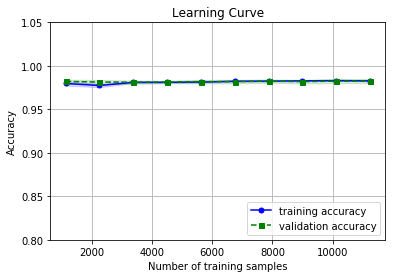

In [29]:
train_mean = np.mean(train_scores, axis = 1)
train_std  = np.std(train_scores, axis = 1)
test_mean  = np.mean(test_scores, axis = 1)
test_std  = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, 
         color = 'blue', marker = 'o', 
         markersize = 5, 
         label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, 
                              train_mean - train_std,
                              alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, 
         color = 'green', linestyle = '--',  
         marker = 's', markersize = 5, 
         label = 'validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, 
                              test_mean - test_std,
                              alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.8, 1.05])
plt.title('Learning Curve')

Text(0.5,1,'Validation Curve')

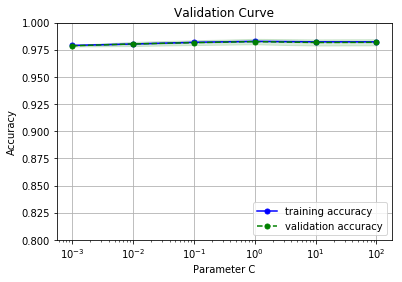

In [30]:
# Overfitting and underfitting with Validation Curves 
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] # comparative statics 

train_scores, test_scores = validation_curve(
                        estimator = pipe_lr,
                        X = X_train,
                        y = y_train,
                        param_name = 'clf__C',
                        param_range = param_range, 
                        cv = 10)

train_mean = np.mean(train_scores, axis = 1)
train_std   = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std   = np.std(test_scores, axis = 1)

plt.plot(param_range, train_mean, 
         color = 'blue', marker = 'o', 
         markersize = 5, 
         label = 'training accuracy')
plt.fill_between(param_range, train_mean + train_std, 
                              train_mean - train_std,
                              alpha = 0.15, color = 'blue')

plt.plot(param_range, test_mean, 
         color = 'green', linestyle = '--',
         marker = 'o', markersize = 5, 
         label = 'validation accuracy')
plt.fill_between(param_range, test_mean + test_std, 
                              test_mean - test_std,
                              alpha = 0.15, color = 'green')

plt.grid()
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.title('Validation Curve')

In [31]:
# Fine-tuning ML with Grid Search
# Grid search is a brute force exhaustive searching paradigm
# specify list of hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()), 
                     ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range,
               'clf__kernel': ['linear']},
              {'clf__C': param_range,
               'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator = pipe_svc,
                 param_grid = param_grid,
                 scoring = 'accuracy',
                 cv = 10,
                 n_jobs = -1)

gs = gs.fit(X_train, y_train) 

print(gs.best_score_)
print(gs.best_estimator_)

0.982634443022
Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])


In [32]:
# Take the best estimator, refit to the training data, 
# check performance and go with it! 

clf = gs.best_estimator_

clf.fit(X_train, y_train)

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.982


In [33]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

names = ["Perceptron",
         "LogisticRegression",
         "Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         "RBF SVM",          
         "Neural Net", 
         "Naive Bayes",  
         "Nearest Neighbors"] 

classifiers = [
    Perceptron(),
    LogisticRegression(),
    SVC(kernel="linear", C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=400, max_features=1),
    SVC(kernel='rbf',gamma=2, C=1),
    MLPClassifier(hidden_layer_sizes=(100,50,50), alpha=1),
    GaussianNB(),
    KNeighborsClassifier(5)]

for name, clf in zip(names, classifiers):
    pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components = 2)), # try 10
                    ('clf', clf) ])
 
    pipe_lr.fit(X_train, y_train) 

    print('Test Accuracy of: {0:<20s} has Score: {1:0.4f}'.format(name, pipe_lr.score(X_test, y_test)))

Test Accuracy of: Perceptron           has Score: 0.9782
Test Accuracy of: LogisticRegression   has Score: 0.9792
Test Accuracy of: Linear SVM           has Score: 0.9782
Test Accuracy of: Decision Tree        has Score: 0.9770
Test Accuracy of: Random Forest        has Score: 0.9754
Test Accuracy of: RBF SVM              has Score: 0.9773
Test Accuracy of: Neural Net           has Score: 0.9782
Test Accuracy of: Naive Bayes          has Score: 0.9693
Test Accuracy of: Nearest Neighbors    has Score: 0.9766


In [ ]:
# we do the same to quad data

In [34]:
#from sklearn.cross_validation import train_test_split # this is DeprecationWarning

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xquad, yquad, test_size = 0.2, 
                                                    stratify=yquad,
                                                    random_state = 1)

print(X_train.shape, X_test.shape)

(19181, 7) (4796, 7)


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
#from sklearn.decomposition import KernelPCA

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),      # Step 4
                    ('pca', PCA(n_components = 2)), # Step 5
                    ('clf', LogisticRegression(random_state=1))]) # Step 6

pipe_lr.fit(X_train, y_train) 

print('Test Accuracy: %0.6f' % pipe_lr.score(X_test, y_test)) # Step 7 evaluate

Test Accuracy: 0.963094


In [36]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# p. 193 -- StratifiedKFold cross-validation example
import numpy as np

from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits = 10, 
                       random_state = 1).split(X_train, y_train)

scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])    
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Accuracy %0.3f' % (k+1, 
           np.bincount(y_train[train]), score))

Fold: 1, Class dist.: [16580   682], Accuracy 0.964
Fold: 2, Class dist.: [16580   682], Accuracy 0.961
Fold: 3, Class dist.: [16580   682], Accuracy 0.963
Fold: 4, Class dist.: [16581   682], Accuracy 0.961
Fold: 5, Class dist.: [16581   682], Accuracy 0.960
Fold: 6, Class dist.: [16581   682], Accuracy 0.962
Fold: 7, Class dist.: [16581   682], Accuracy 0.962
Fold: 8, Class dist.: [16581   682], Accuracy 0.963
Fold: 9, Class dist.: [16581   683], Accuracy 0.959
Fold: 10, Class dist.: [16581   683], Accuracy 0.963


In [37]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.962 +/- 0.001


In [38]:
# Using cross_val_score() for more succinct code
from sklearn.model_selection import cross_val_score # uses stratified k-fold cross-validation

scores = cross_val_score( estimator = pipe_lr,
                        X = X_train,
                        y = y_train,
                        cv = 10,
                        n_jobs = 1)

print('CV accuracy scores: %s' % scores)
print('Mean CV: %.3f' % np.mean(scores))

CV accuracy scores: [ 0.96352267  0.96091714  0.96300156  0.96089677  0.95985401  0.96193952
  0.9624609   0.96298227  0.95931142  0.96348461]
Mean CV: 0.962


In [39]:
%matplotlib inline

import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve

pipe_lr = Pipeline([
        ('scl', StandardScaler()),
#        ('pca', PCA(n_components = 2)),
        ('clf', LogisticRegression(penalty='l2', random_state=0))])

train_sizes, train_scores, test_scores = learning_curve( estimator = pipe_lr,
                                                       X = X_train,
                                                       y = y_train,
                                                       train_sizes = np.linspace(0.1, 1.0, 10), # 10 evenly spaced intervals 
                                                       cv = 10,
                                                       n_jobs = 1)

Text(0.5,1,'Learning Curve')

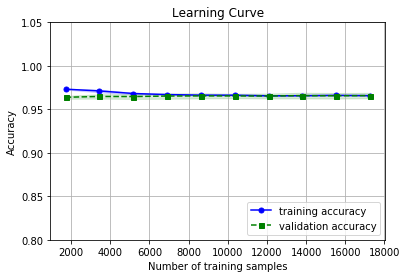

In [40]:
train_mean = np.mean(train_scores, axis = 1)
train_std  = np.std(train_scores, axis = 1)
test_mean  = np.mean(test_scores, axis = 1)
test_std  = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, 
         color = 'blue', marker = 'o', 
         markersize = 5, 
         label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, 
                              train_mean - train_std,
                              alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, 
         color = 'green', linestyle = '--',  
         marker = 's', markersize = 5, 
         label = 'validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, 
                              test_mean - test_std,
                              alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.8, 1.05])
plt.title('Learning Curve')

Text(0.5,1,'Validation Curve')

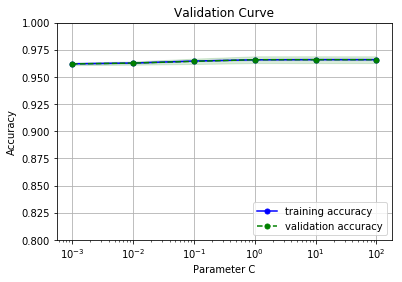

In [41]:
# Overfitting and underfitting with Validation Curves 
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] # comparative statics 

train_scores, test_scores = validation_curve(
                        estimator = pipe_lr,
                        X = X_train,
                        y = y_train,
                        param_name = 'clf__C',
                        param_range = param_range, 
                        cv = 10)

train_mean = np.mean(train_scores, axis = 1)
train_std   = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std   = np.std(test_scores, axis = 1)

plt.plot(param_range, train_mean, 
         color = 'blue', marker = 'o', 
         markersize = 5, 
         label = 'training accuracy')
plt.fill_between(param_range, train_mean + train_std, 
                              train_mean - train_std,
                              alpha = 0.15, color = 'blue')

plt.plot(param_range, test_mean, 
         color = 'green', linestyle = '--',
         marker = 'o', markersize = 5, 
         label = 'validation accuracy')
plt.fill_between(param_range, test_mean + test_std, 
                              test_mean - test_std,
                              alpha = 0.15, color = 'green')

plt.grid()
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.title('Validation Curve')

In [42]:
# Fine-tuning ML with Grid Search
# Grid search is a brute force exhaustive searching paradigm
# specify list of hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()), 
                     ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range,
               'clf__kernel': ['linear']},
              {'clf__C': param_range,
               'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator = pipe_svc,
                 param_grid = param_grid,
                 scoring = 'accuracy',
                 cv = 10,
                 n_jobs = -1)

gs = gs.fit(X_train, y_train) 

print(gs.best_score_)
print(gs.best_estimator_)

0.966998592357
Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])


In [43]:
# Take the best estimator, refit to the training data, 
# check performance and go with it! 

clf = gs.best_estimator_

clf.fit(X_train, y_train)

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.970


In [44]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

names = ["Perceptron",
         "LogisticRegression",
         "Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         "RBF SVM",          
         "Neural Net", 
         "Naive Bayes",  
         "Nearest Neighbors"] 

classifiers = [
    Perceptron(),
    LogisticRegression(),
    SVC(kernel="linear", C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=400, max_features=1),
    SVC(kernel='rbf',gamma=2, C=1),
    MLPClassifier(hidden_layer_sizes=(100,50,50), alpha=1),
    GaussianNB(),
    KNeighborsClassifier(5)]

for name, clf in zip(names, classifiers):
    pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components = 2)), # try 10
                    ('clf', clf) ])
 
    pipe_lr.fit(X_train, y_train) 

    print('Test Accuracy of: {0:<20s} has Score: {1:0.4f}'.format(name, pipe_lr.score(X_test, y_test)))

Test Accuracy of: Perceptron           has Score: 0.9606
Test Accuracy of: LogisticRegression   has Score: 0.9631
Test Accuracy of: Linear SVM           has Score: 0.9606
Test Accuracy of: Decision Tree        has Score: 0.9623
Test Accuracy of: Random Forest        has Score: 0.9595
Test Accuracy of: RBF SVM              has Score: 0.9612
Test Accuracy of: Neural Net           has Score: 0.9621
Test Accuracy of: Naive Bayes          has Score: 0.9556
Test Accuracy of: Nearest Neighbors    has Score: 0.9604


In [ ]:
# regression analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.misc.pilutil import imread
import matplotlib.cm as cm

In [2]:
aggregate0 = pd.read_csv("agg_match_stats_0.csv",nrows=1000)
aggregate1 = pd.read_csv("agg_match_stats_1.csv",nrows=1000)
aggregate2 = pd.read_csv("agg_match_stats_2.csv",nrows=1000)
aggregate3 = pd.read_csv("agg_match_stats_3.csv",nrows=1000)
aggregate4 = pd.read_csv("agg_match_stats_4.csv",nrows=1000)

aggregate = pd.concat([aggregate0,aggregate1,aggregate2,aggregate3, aggregate4])

print (aggregate.head(),'\n',len(aggregate))

                       date  game_size  \
0  2017-11-26T20:59:40+0000         37   
1  2017-11-26T20:59:40+0000         37   
2  2017-11-26T20:59:40+0000         37   
3  2017-11-26T20:59:40+0000         37   
4  2017-11-26T20:59:40+0000         37   

                                            match_id match_mode  party_size  \
0  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   
1  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   
2  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   
3  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   
4  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   

   player_assists  player_dbno  player_dist_ride  player_dist_walk  \
0               0            1        2870.72400       1784.847780   
1               0            1        2938.40723       1756.079710   
2               0            0           0.00000        224.15

In [3]:
aggregate['match_mode'] = aggregate['match_mode'].astype(object)
#print (aggregate.head(),'\n',len(aggregate))


# create a binary variable for future analysis.

aggregate['win'] = np.where(aggregate['team_placement']==1, 1, 0)
print(aggregate.dtypes)

date                    object
game_size                int64
match_id                object
match_mode              object
party_size               int64
player_assists           int64
player_dbno              int64
player_dist_ride       float64
player_dist_walk       float64
player_dmg               int64
player_kills             int64
player_name             object
player_survive_time    float64
team_id                  int64
team_placement           int64
win                      int32
dtype: object


In [4]:
# solo match
solo=aggregate[aggregate["party_size"]==1]
print (len(solo))
# duo match
duo=aggregate[aggregate["party_size"]==2]
print (len(duo))
# quad match
quad=aggregate[aggregate["party_size"]==4]
print (len(quad))

1003
1433
2564


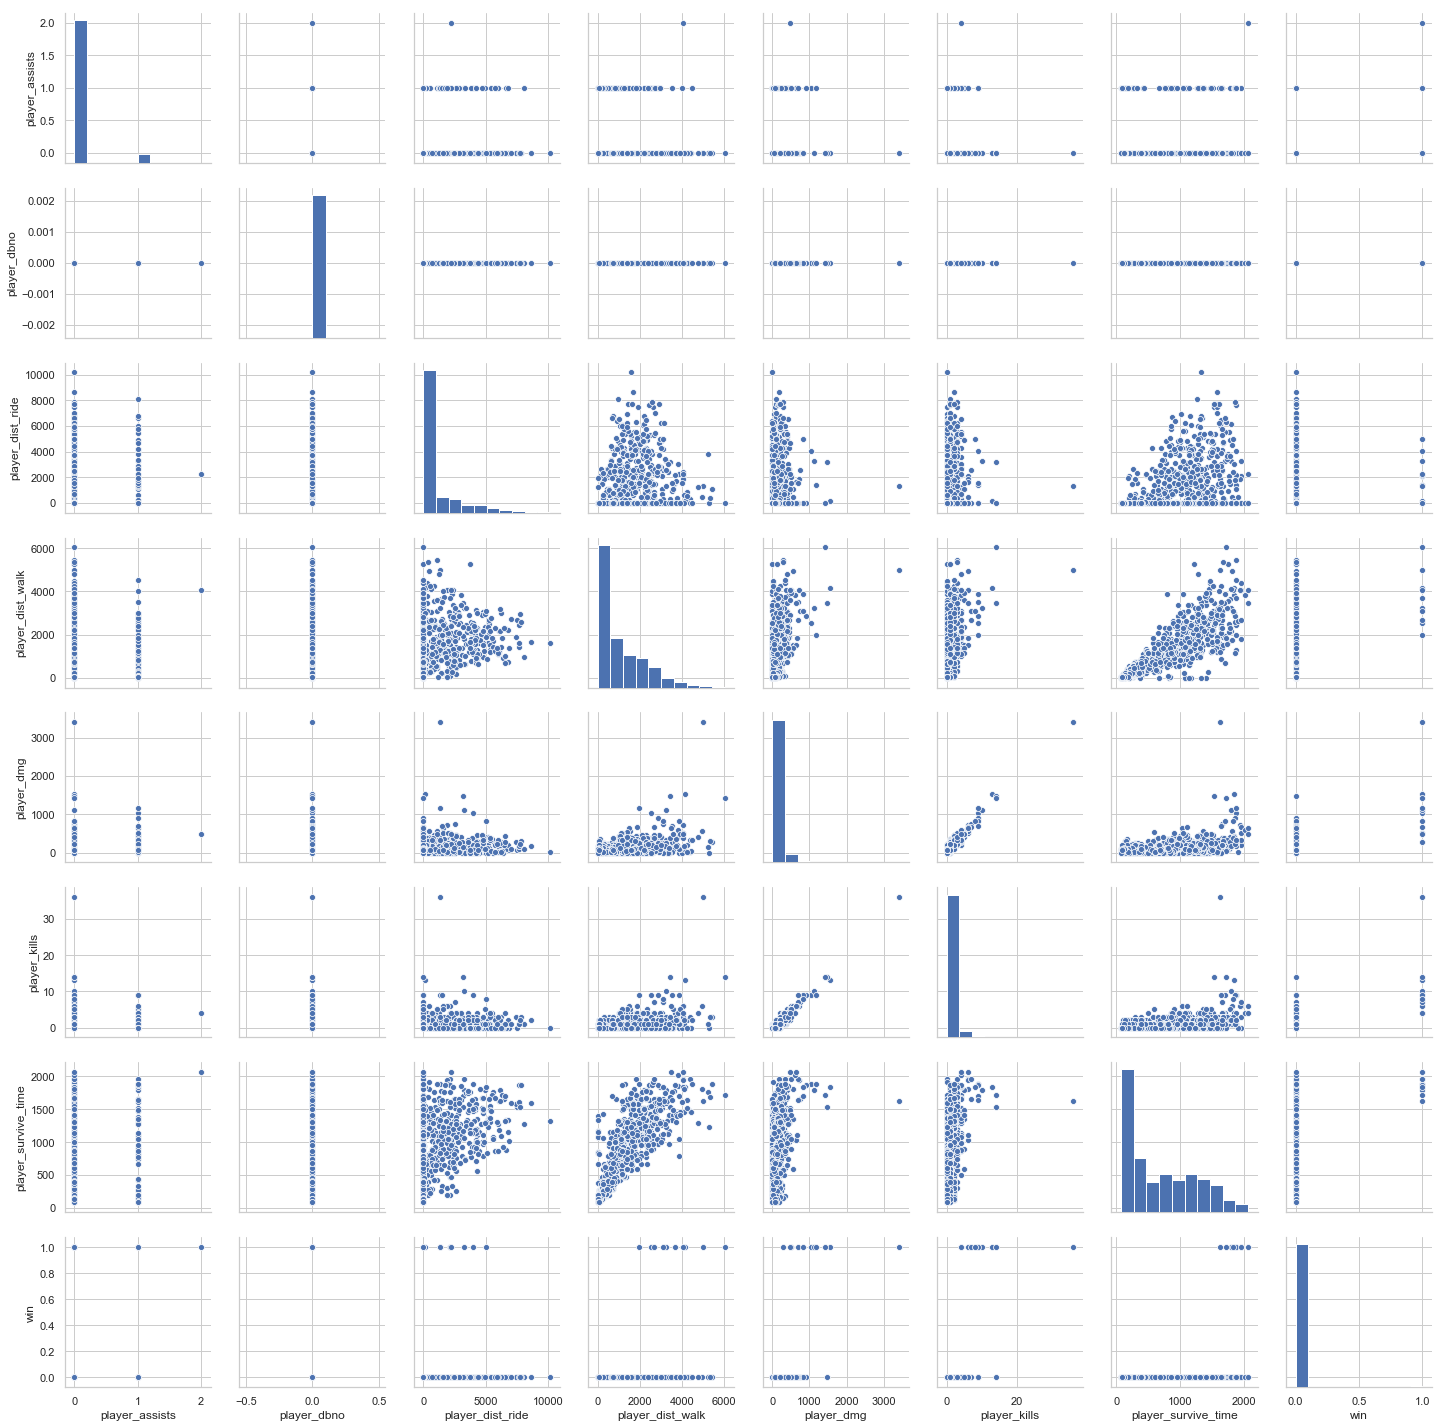

In [5]:
sns.set(style = 'whitegrid', context = 'notebook')

cols = ['player_assists','player_dbno','player_dist_ride','player_dist_walk','player_dmg','player_kills','player_survive_time','win']

sns.pairplot(solo[cols], height = 2.5) #Size has been renamed to height
plt.show()

D:\SoftwareEn\PhythonAna\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\SoftwareEn\PhythonAna\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


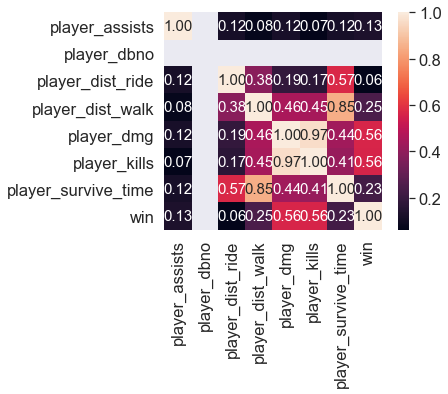

In [6]:
cm = np.corrcoef(solo[cols].values.T)
sns.set(font_scale= 1.5)
hm = sns.heatmap(cm, 
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size': 15},
                yticklabels = cols,
                xticklabels = cols)
plt.show()

In [7]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [8]:
df1=pd.DataFrame(solo, columns=['player_assists','player_dbno', 'player_dist_ride', 'player_dist_walk','player_survive_time'])

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#X = aggregate.iloc[:,[6,7,8,9,10,11]].values
X = df1.iloc[:, :-1].values
y = df1['player_survive_time'].values
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
model=slr.fit(X_train, y_train)

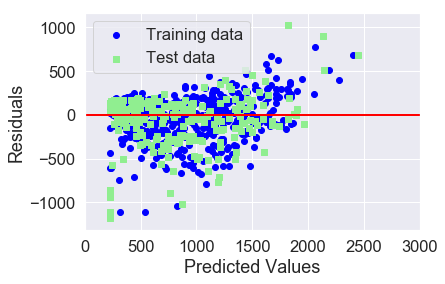

In [10]:
# Plotting residuals
plt.scatter(y_train_pred, y_train_pred-y_train,
           c='blue', marker='o', label='Training data')

plt.scatter(y_test_pred, y_test_pred-y_test,
           c='lightgreen', marker='s', label='Test data')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')

plt.hlines(y=0, xmin = 0, xmax = 3000, lw=2, color='red')
plt.xlim([0,3000])
plt.show()

In [11]:
a  = slr.intercept_
 
b = slr.coef_
print("intercept",a,",coef：",b)

intercept 225.53578961384716 ,coef： [ 3.79812520e+01 -6.52600196e-12  8.52569752e-02  3.60991430e-01]


In [12]:
# Mean=Squared-Error - measure's model performance
from sklearn.metrics import mean_squared_error
print('MSE Train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                       mean_squared_error(y_test,  y_test_pred)) )

MSE Train: 53681.529, test: 73858.559


In [13]:
# R2 -- coefficient of determination measures the fraction of the response variance that is captured by the model
# R2 = 1 - (SSE/SST) 
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), 
                                       r2_score(y_test , y_test_pred))  )

R^2 train: 0.809, test: 0.763


In [14]:
#Random Forest
X = df1.iloc[:, :-1].values # input X data
y = df1['player_survive_time'].values

X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size = 0.4,
            random_state = 1)

In [15]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(
                    n_estimators = 1000,
                    criterion = 'mse',
                    random_state = 1,
                    n_jobs = -1)

In [16]:
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred  = forest.predict(X_test) 

In [17]:
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test,  y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test,  y_test_pred) ) )
#Overfitting?

MSE train: 11831.763, test: 60627.547
R^2 train: 0.961, test: 0.778


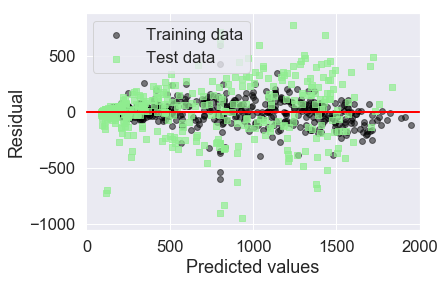

In [18]:
# Looking at the residuals behavior
plt.scatter(y_train_pred, y_train_pred - y_train,
           c = 'black',
           marker = 'o',
           s = 35,
           alpha = 0.5,
           label = 'Training data')

plt.scatter(y_test_pred, y_test_pred - y_test,
           c = 'lightgreen',
           marker = 's',
           s = 35,
           alpha = 0.7,
           label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residual')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin=-10, xmax = 2200, lw = 2, color = 'red')
plt.xlim([-10, 2000])

plt.show()

In [19]:
#Duo
df2=pd.DataFrame(duo, columns=['player_assists','player_dbno', 'player_dist_ride', 'player_dist_walk','player_survive_time'])

In [20]:
X = df2.iloc[:, :-1].values # input X data
y = df2['player_survive_time'].values

X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size = 0.4,
            random_state = 1)

In [21]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(
                    n_estimators = 1000,
                    criterion = 'mse',
                    random_state = 1,
                    n_jobs = -1)

In [22]:
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred  = forest.predict(X_test)

In [23]:
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test,  y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test,  y_test_pred) ) )
#Overfitting?

MSE train: 10301.454, test: 44984.471
R^2 train: 0.971, test: 0.865


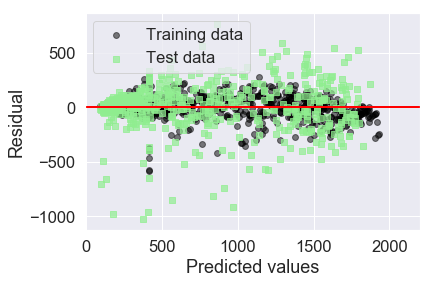

In [24]:
# Looking at the residuals behavior
plt.scatter(y_train_pred, y_train_pred - y_train,
           c = 'black',
           marker = 'o',
           s = 35,
           alpha = 0.5,
           label = 'Training data')

plt.scatter(y_test_pred, y_test_pred - y_test,
           c = 'lightgreen',
           marker = 's',
           s = 35,
           alpha = 0.7,
           label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residual')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin=-10, xmax = 2200, lw = 2, color = 'red')
plt.xlim([-10, 2200])

plt.show()

In [25]:
#Quad
df3=pd.DataFrame(quad, columns=['player_assists','player_dbno', 'player_dist_ride', 'player_dist_walk','player_survive_time'])

In [26]:
X = df3.iloc[:, :-1].values # input X data
y = df3['player_survive_time'].values

X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size = 0.4,
            random_state = 1)

In [27]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(
                    n_estimators = 1000,
                    criterion = 'mse',
                    random_state = 1,
                    n_jobs = -1)

In [28]:
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred  = forest.predict(X_test) 

In [29]:
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test,  y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test,  y_test_pred) ) )
#Overfitting?

MSE train: 8849.603, test: 47693.984
R^2 train: 0.975, test: 0.862


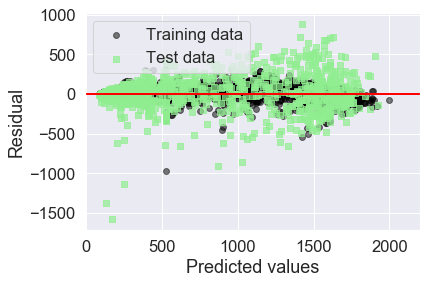

In [30]:
# Looking at the residuals behavior
plt.scatter(y_train_pred, y_train_pred - y_train,
           c = 'black',
           marker = 'o',
           s = 35,
           alpha = 0.5,
           label = 'Training data')

plt.scatter(y_test_pred, y_test_pred - y_test,
           c = 'lightgreen',
           marker = 's',
           s = 35,
           alpha = 0.7,
           label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residual')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin=-10, xmax = 2200, lw = 2, color = 'red')
plt.xlim([-10, 2200])

plt.show()

In [ ]:
# more intuitive analysis

In [45]:
aggregate0 = pd.read_csv("agg_match_stats_0.csv",nrows=10000)
aggregate1 = pd.read_csv("agg_match_stats_1.csv",nrows=10000)
aggregate2 = pd.read_csv("agg_match_stats_2.csv",nrows=10000)
aggregate3 = pd.read_csv("agg_match_stats_3.csv",nrows=10000)
aggregate4 = pd.read_csv("agg_match_stats_4.csv",nrows=10000)

df = pd.concat([aggregate0,aggregate1,aggregate2,aggregate3, aggregate4])


In [46]:

df = df.dropna()
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49927 entries, 0 to 9999
Data columns (total 15 columns):
date                   49927 non-null object
game_size              49927 non-null int64
match_id               49927 non-null object
match_mode             49927 non-null object
party_size             49927 non-null int64
player_assists         49927 non-null int64
player_dbno            49927 non-null int64
player_dist_ride       49927 non-null float64
player_dist_walk       49927 non-null float64
player_dmg             49927 non-null int64
player_kills           49927 non-null int64
player_name            49927 non-null object
player_survive_time    49927 non-null float64
team_id                49927 non-null int64
team_placement         49927 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 6.1+ MB


In [47]:
# 添加是否成功吃鸡列
df['won'] = df['team_placement'] == 1

# 添加是否搭乘过车辆列
df['drove'] = df['player_dist_ride'] != 0

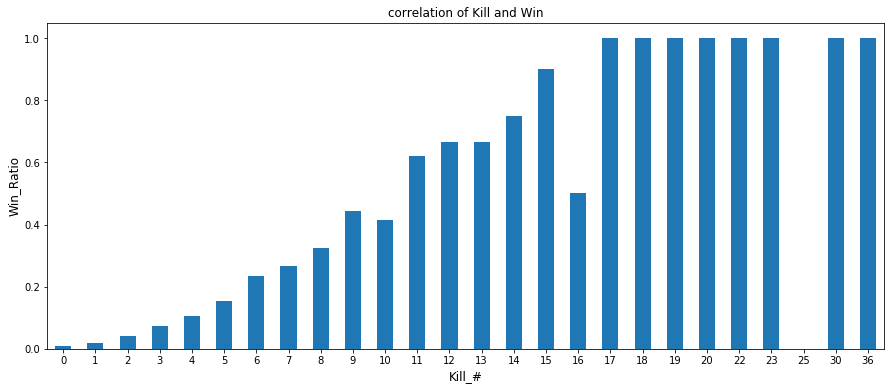

In [48]:
df.loc[df['player_kills'] < 40, ['player_kills', 'won']].groupby('player_kills').won.mean().plot.bar(figsize=(15,6), rot=0)
plt.xlabel('Kill_#', fontsize=12)
plt.ylabel("Win_Ratio", fontsize=12)
plt.title('correlation of Kill and Win', fontsize=12)
plt.show()

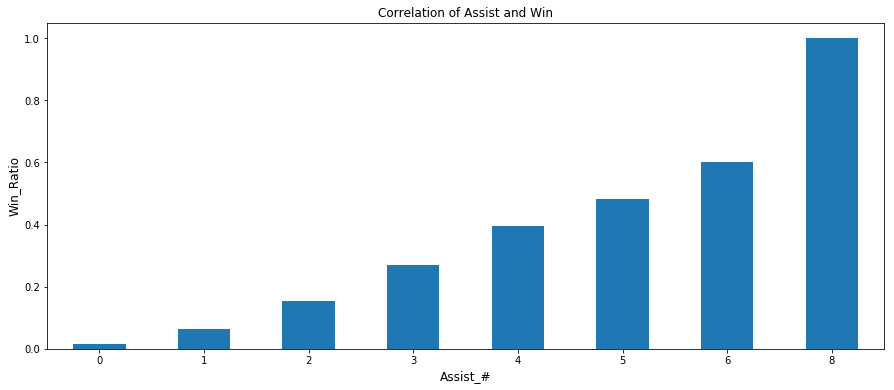

In [49]:
df.loc[df['party_size']!=1, ['player_assists', 'won']].groupby('player_assists').won.mean().plot.bar(figsize=(15,6), rot=0)
plt.xlabel('Assist_#', fontsize=12)
plt.ylabel("Win_Ratio", fontsize=12)
plt.title('Correlation of Assist and Win', fontsize=12)
plt.show()

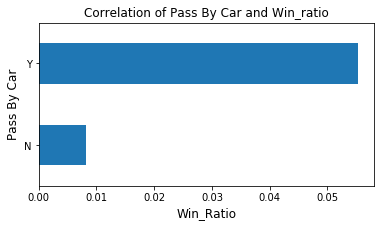

In [50]:
df.groupby('drove').won.mean().plot.barh(figsize=(6,3))
plt.xlabel("Win_Ratio", fontsize=12)
plt.ylabel("Pass By Car", fontsize=12)
plt.title('Correlation of Pass By Car and Win_ratio', fontsize=12)
plt.yticks([1,0],['Y','N'])
plt.show()

In [51]:
dist_ride = df.loc[df['player_dist_ride']<12000, ['player_dist_ride', 'won']]
labels=["0-1k", "1-2k", "2-3k", "3-4k","4-5k", "5-6k", "6-7k", "7-8k", "8-9k", "9-10k", "10-11k", "11-12k"]
dist_ride['drove_cut'] = pd.cut(dist_ride['player_dist_ride'], 12, labels=labels)

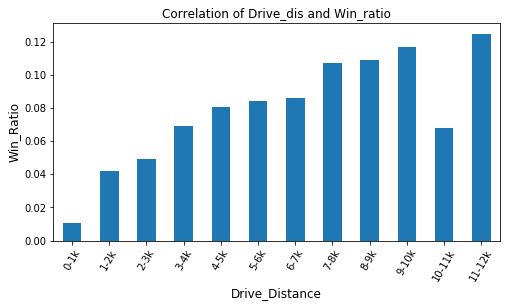

In [52]:
dist_ride.groupby('drove_cut').won.mean().plot.bar(rot=60, figsize=(8,4))
plt.xlabel("Drive_Distance", fontsize=12)
plt.ylabel("Win_Ratio", fontsize=12)
plt.title('Correlation of Drive_dis and Win_ratio', fontsize=12)
plt.show()

In [53]:
match_unique = df.loc[df['party_size'] == 1, 'match_id'].unique()

In [54]:
dist_walk = df.loc[df['player_dist_walk']<12000, ['player_dist_walk', 'won']]
labels=["0-1k", "1-2k", "2-3k", "3-4k","4-5k", "5-6k", "6-7k", "7-8k", "8-9k", "9-10k", "10-11k", "11-12k"]
dist_walk['drove_cut'] = pd.cut(dist_walk['player_dist_walk'], 12, labels=labels)

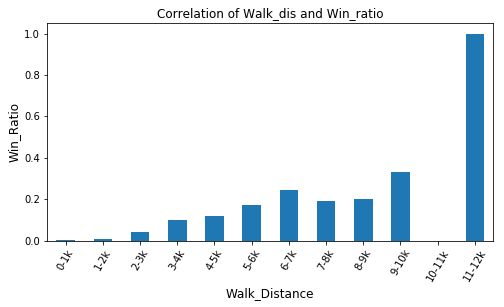

In [55]:
dist_walk.groupby('drove_cut').won.mean().plot.bar(rot=60, figsize=(8,4))
plt.xlabel("Walk_Distance", fontsize=12)
plt.ylabel("Win_Ratio", fontsize=12)
plt.title('Correlation of Walk_dis and Win_ratio', fontsize=12)
plt.show()

In [56]:
df['player_average_walk'] = df['player_dist_walk'] /df['player_survive_time']
average_walk = df.loc[df['player_average_walk']<5, ['player_average_walk', 'won']]
labels=["0-0.5", "0.5-1", "1-1.5", "1.5-2","2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]
average_walk['drove_cut'] = pd.cut(average_walk['player_average_walk'], 10, labels=labels)

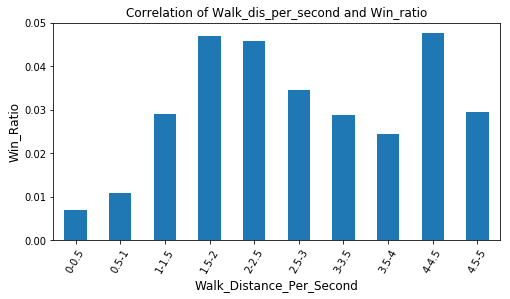

In [57]:
average_walk.groupby('drove_cut').won.mean().plot.bar(rot=60, figsize=(8,4))
plt.xlabel("Walk_Distance_Per_Second", fontsize=12)
plt.ylabel("Win_Ratio", fontsize=12)
plt.title('Correlation of Walk_dis_per_second and Win_ratio', fontsize=12)
plt.show()

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random

In [2]:
# Chargement de la base de données
# On limite à 50000 entrées afin de travailler en ligne efficacement
df = pd.read_csv("kill_match_stats_final_0.csv")
df = df[df.map=="ERANGEL"]
df = df.dropna()
n_entries=50000
deaths = df.head(n_entries)

In [3]:
deaths.head()

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
179,Down and Out,Malcolm_x,9.0,496989.8,312569.7,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1035,Relugar,22.0,497385.4,331528.2
180,M16A4,Malcolm_x,9.0,496989.8,312569.7,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1035,LiPoBattery,22.0,497819.4,331981.3
181,AKM,G_Berg,7.0,460416.7,414748.8,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1422,cornsour,16.0,459817.9,414426.3
182,AKM,Lukesnake17,20.0,488034.1,347220.3,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1210,Homebrw,9.0,487444.2,347651.0
183,SKS,AlooGobi,2.0,501062.9,425078.6,ERANGEL,2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...,1818,Powfa,3.0,493043.4,434458.1


In [4]:
deaths['distance'] = np.sqrt(np.power(deaths['victim_position_x']-deaths['killer_position_x'],2)+np.power(deaths['victim_position_y']-deaths['killer_position_y'],2))


C:\Users\11757\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
# Simplification du dataset aux données nous intéressant

deaths = deaths[['victim_name','victim_placement','distance','time','killer_name','killer_placement']]
deaths.head()

,victim_name,victim_placement,distance,time,killer_name,killer_placement
179,Relugar,22.0,18962.626970,1035,Malcolm_x,9.0
180,LiPoBattery,22.0,19429.319358,1035,Malcolm_x,9.0
181,cornsour,16.0,680.123290,1422,G_Berg,7.0
182,Homebrw,9.0,730.400233,1210,Lukesnake17,20.0
183,Powfa,3.0,12340.478131,1818,AlooGobi,2.0


In [6]:
features = ['time','killer_placement','distance','victim_placement']

x = deaths[features]
x = StandardScaler().fit_transform(x)

print("Les moyennes :",np.mean(x,axis=0)) # les moyennes devraient être égales à 0
print("\nLes écarts-types :",np.std(x,axis=0,ddof=0)) # les écarts type devraient être égals à 1
print("\nLa matrice de corrélation :\n",(1/n_entries)*np.matmul(np.transpose(x),x))

Les moyennes : [  1.48503432e-17  -6.76436684e-17  -3.66640052e-17  -5.68434189e-19]

Les écarts-types : [ 1.  1.  1.  1.]

La matrice de corrélation :
 [[ 1.         -0.53459667 -0.05442709 -0.62809483]
 [-0.53459667  1.          0.01544181  0.68033208]
 [-0.05442709  0.01544181  1.          0.06382522]
 [-0.62809483  0.68033208  0.06382522  1.        ]]


In [7]:
n_components=len(features)
pca = PCA()
principal_comps = pca.fit_transform(x)
print("The number of components : ",pca.n_components_)
print("\nVariance explained by each component:",pca.explained_variance_)
print("\nPercentage of the vairance explained by this component : ",pca.explained_variance_ratio_*100)
corvar=pca.get_covariance()
print("\nconvariance:\n",corvar)

The number of components :  4

Variance explained by each component: [ 2.23552244  0.99724427  0.46926108  0.29805222]

Percentage of the vairance explained by this component :  [ 55.88694321  24.93060806  11.73129228   7.45115645]

convariance:
 [[ 1.00002    -0.53460736 -0.05442818 -0.62810739]
 [-0.53460736  1.00002     0.01544212  0.68034569]
 [-0.05442818  0.01544212  1.00002     0.0638265 ]
 [-0.62810739  0.68034569  0.0638265   1.00002   ]]


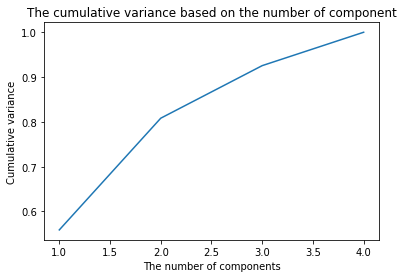

In [8]:
# plot to show the correlation between variance and the number of components
plt.plot(np.arange(1,n_components+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("The cumulative variance based on the number of component")
plt.ylabel("Cumulative variance")
plt.xlabel("The number of components")
plt.show()
# from the plot, we can see that among 4 principal components, three components can only explain less than 25% variance,
#which we think cannot give us the good explaination of the dataset.

In [9]:
n_components=2
pca = PCA(n_components)
principal_comps = pca.fit_transform(x)
print("The number of key PCA: ",pca.n_components_)
print("\n Variance explained by each component  :",pca.explained_variance_)
print("\nPercentage of the vairance explained by this component : ",pca.explained_variance_ratio_*100)

The number of key PCA:  2

 Variance explained by each component  : [ 2.23552244  0.99724427]

Percentage of the vairance explained by this component :  [ 55.88694321  24.93060806]


In [10]:
# Calculate the equigenvalues
# On obtient la matrice de changement de base
print("The matrix of the orinigal feature values:\n",pca.components_)
print("\n Matrix of the transformed features :\n",principal_comps)

The matrix of the orinigal feature values:
 [[-0.55545798  0.57179966  0.0626381   0.60048984]
 [ 0.00985177 -0.08431166  0.99628481 -0.01452775]]

 Matrix of the transformed features :
 [[-0.60927461  0.0243978 ]
 [-0.60898134  0.0290624 ]
 [-1.27704626 -0.13523664]
 ..., 
 [ 1.50515523 -0.28064025]
 [-1.90840424 -0.09416941]
 [-2.33113394 -0.07717669]]


In [ ]:
fig, axes = plt.subplots()
tmp_df=pd.DataFrame(columns=list(deaths))
# Placement des étiquettes des observations
for i in range(10):
    r=random.randint(0,n_entries)
    tmp_df.loc[i]=deaths.iloc[r]
    plt.annotate(tmp_df.loc[i].victim_name,(principal_comps[r,0],principal_comps[r,1]))
    
# add the axe
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.margins(x=-.25, y=-0.465)

plt.show()
tmp_df

In [15]:
# Each player's overall contribution 
dist = np.sum(x**2,axis=1)
print("Each player's overall contribution :\n",dist)
# The PCA value for each player
cos2 = principal_comps**2
for i in range(n_components):
    cos2[:,i] = cos2[:,i]/dist
print("\nThe PCA value for each player(percentage) :\n",cos2*100)

Each player's overall contribution :
 [ 0.46967784  0.46955466  2.08199276 ...,  2.38836942  3.9531543
  6.05099364]

The PCA value for each player(percentage) :
 [[ 79.03620629   0.12673635]
 [ 78.98085173   0.17987743]
 [ 78.33106763   0.87843475]
 ..., 
 [ 94.85518585   3.29760328]
 [ 92.12913228   0.22432409]
 [ 89.80649765   0.09843412]]


In [16]:
# Build the x,y plan(axes)  找到每个player PCA之后的横纵坐标
ctr = principal_comps**2
for j in range(n_components):
    ctr[:,j] = ctr[:,j]/(n_entries*pca.explained_variance_[j])

print("The first 10 (x,y) values  : \n")
print(pd.DataFrame({'Axe 1':ctr[:,0],'Axe 2':ctr[:,1]}).head(10))

The first 10 (x,y) values  : 

      Axe 1         Axe 2
0  0.000003  1.193795e-08
1  0.000003  1.693914e-08
2  0.000015  3.667897e-07
3  0.000005  8.755311e-07
4  0.000046  1.499017e-08
5  0.000039  8.080984e-09
6  0.000058  3.110473e-06
7  0.000032  1.378204e-08
8  0.000014  1.006267e-06
9  0.000049  1.655613e-08


In [17]:
# Coorelation between variables and key component 
sqrt_vp = np.sqrt(pca.explained_variance_)
varfac = np.zeros((len(features),len(features)))
for i in range(n_components): 
    varfac[:,i] = pca.components_[i,:] * sqrt_vp[i]

print(pd.DataFrame({'Variable':features,'Component 1':varfac[:,0],'Component 2':varfac[:,1]}))

   Component 1  Component 2          Variable
0    -0.830502     0.009838              time
1     0.854936    -0.084195  killer_placement
2     0.093654     0.994911          distance
3     0.897832    -0.014508  victim_placement


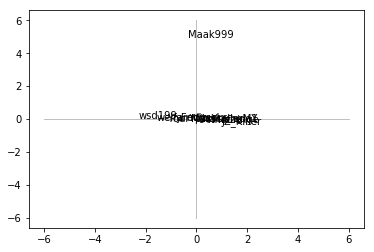

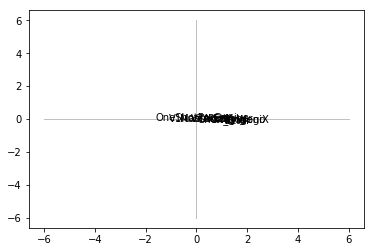

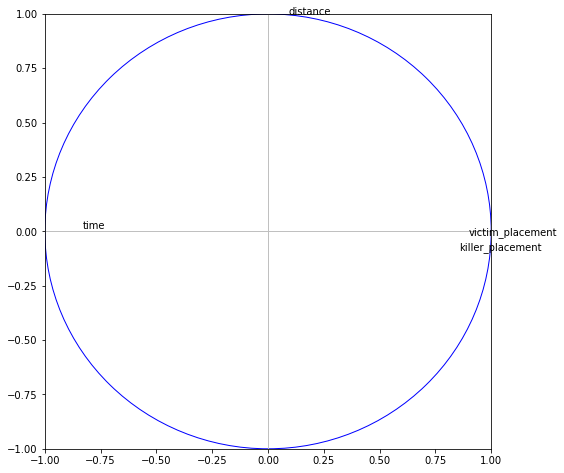

In [18]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Add the name of each variable 
for j in range(len(features)):
    plt.annotate(features[j],(varfac[j,0],varfac[j,1]))

# add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
# add the circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()

In [19]:
#classifier with all variables
kill_match_classifier=deaths
X=kill_match_classifier.iloc[:,1:3].values
y=kill_match_classifier.iloc[:,5].values

In [20]:
#classifier with all variables
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

names = ["Perceptron",
         "LogisticRegression",
         "Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         "RBF SVM",          
         "Neural Net", 
         "Naive Bayes",  
         "Nearest Neighbors"] 

classifiers = [
    LogisticRegression(),  #logistic could be removed
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    MLPClassifier(hidden_layer_sizes=(100,50), alpha=1),
    KNeighborsClassifier(5)]   #for KNN, cluster number could be modified later and try

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, 
                            random_state=0)

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, score))


Algo: Perceptron           and Score: 0.1246
Algo: LogisticRegression   and Score: 0.1347
Algo: Linear SVM           and Score: 0.1375
Algo: Decision Tree        and Score: 0.1315
Algo: Random Forest        and Score: 0.1145


In [ ]:
# more visualization